### Predicting players rating
In this project we are going to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.

The dataset we are going to use is from European Soccer Database (https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.

### About the Dataset
The ultimate Soccer database for data analysis and machine learning.
The dataset comes in the form of an SQL database and contains statistics of about 25,000 football matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations, with player names and a pair of coordinates to indicate their position on the pitch.
- +25,000 matches
- +10,000 players
- 11 European Countries with their lead championship
- Seasons 2008 to 2016
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
- Team line up with squad formation (X, Y coordinates)
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches

The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video games. It is not just the stats that come with a new version of the game but also the weekly updates. So for instance if a player has performed poorly over a period of time and his stats get impacted in FIFA, you would normally see the same in the dataset.

Import Libraries

In [1]:
# importing necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Creating connection
cnx = sqlite3.connect('Dataset/database.sqlite')
# importing data using sql query
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
# setting max visibile column to 500
pd.set_option('display.max_columns', 500)
# first 5 rows
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
# dropping columns that aren't needed
df.drop(["id", "player_fifa_api_id", "player_api_id", "date"], axis = 1, inplace = True)

EDA

In [5]:
# dimensions of the dataset
df.shape

(183978, 38)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   overall_rating       183142 non-null  float64
 1   potential            183142 non-null  float64
 2   preferred_foot       183142 non-null  object 
 3   attacking_work_rate  180748 non-null  object 
 4   defensive_work_rate  183142 non-null  object 
 5   crossing             183142 non-null  float64
 6   finishing            183142 non-null  float64
 7   heading_accuracy     183142 non-null  float64
 8   short_passing        183142 non-null  float64
 9   volleys              181265 non-null  float64
 10  dribbling            183142 non-null  float64
 11  curve                181265 non-null  float64
 12  free_kick_accuracy   183142 non-null  float64
 13  long_passing         183142 non-null  float64
 14  ball_control         183142 non-null  float64
 15  acceleration     

In [7]:
df.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,52.965675,49.380950,57.069880,63.388879,67.659357,68.051244,65.970910,66.103706,65.189496,61.808427,66.969045,67.038544,67.424529,53.339431,60.948046,52.009271,55.786504,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,18.255788,17.831746,14.394464,15.196671,12.983326,12.569721,12.954585,9.155408,13.063188,16.135143,11.006734,13.165262,12.072280,18.367025,16.089521,19.450133,18.448292,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,58.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,65.000000,68.000000,69.000000,69.000000,58.000000,64.000000,57.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


There are discrepancies in the count due to null values. Let's fix it.

In [8]:
# null values in percentage
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

attacking_work_rate    1.755645
balance                1.474633
vision                 1.474633
agility                1.474633
sliding_tackle         1.474633
volleys                1.474633
jumping                1.474633
curve                  1.474633
strength               0.454402
long_shots             0.454402
aggression             0.454402
interceptions          0.454402
positioning            0.454402
marking                0.454402
penalties              0.454402
standing_tackle        0.454402
gk_diving              0.454402
gk_handling            0.454402
gk_kicking             0.454402
gk_positioning         0.454402
stamina                0.454402
overall_rating         0.454402
shot_power             0.454402
potential              0.454402
reactions              0.454402
sprint_speed           0.454402
acceleration           0.454402
ball_control           0.454402
long_passing           0.454402
free_kick_accuracy     0.454402
dribbling              0.454402
short_pa

Dropping rows where our target variable is unavailable.

In [9]:
# dropping rows where we do not have values for rating
df.dropna(axis = 0, subset=["overall_rating"],inplace=True)

In [10]:
# null values after dropping certain rows
df.isnull().sum().sort_values(ascending=False)

attacking_work_rate    2394
balance                1877
vision                 1877
agility                1877
sliding_tackle         1877
volleys                1877
jumping                1877
curve                  1877
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
marking                   0
penalties                 0
standing_tackle           0
gk_diving                 0
gk_handling               0
gk_kicking                0
gk_positioning            0
stamina                   0
overall_rating            0
shot_power                0
potential                 0
reactions                 0
sprint_speed              0
acceleration              0
ball_control              0
long_passing              0
free_kick_accuracy        0
dribbling                 0
short_passing             0
heading_accuracy          0
finishing                 0
crossing                  0
defensive_work_rate 

Dropping rows where majority data is unavailable.

In [11]:
# dropping rows which contain null in most columns
df.dropna(axis = 0, subset=["balance"],inplace=True)

In [12]:
# null values after dropping certain rows
df.isnull().sum().sort_values(ascending=False)

attacking_work_rate    911
overall_rating           0
penalties                0
stamina                  0
strength                 0
long_shots               0
aggression               0
interceptions            0
positioning              0
vision                   0
marking                  0
shot_power               0
standing_tackle          0
sliding_tackle           0
gk_diving                0
gk_handling              0
gk_kicking               0
gk_positioning           0
jumping                  0
balance                  0
potential                0
reactions                0
preferred_foot           0
defensive_work_rate      0
crossing                 0
finishing                0
heading_accuracy         0
short_passing            0
volleys                  0
dribbling                0
curve                    0
free_kick_accuracy       0
long_passing             0
ball_control             0
acceleration             0
sprint_speed             0
agility                  0
g

Since the percentage of the null values are very low, we shall impute this data by using the column mode grouped by the player's overall rating.

In [13]:
# filling null values by taking the mode of attacking_work_Rate grouped on the basis of their overall rating
df['attacking_work_rate'] = df.groupby(['overall_rating'])['attacking_work_rate'].transform(lambda x: x.fillna(x.mode()[0]))

In [14]:
df.isnull().sum().sum()

0

We no longer have any null values. Let's move on to the next step.

We have 3 categorical columns; preferred_foot, attacking_work_rate, defensive_work_rate. Let's perform one hot encoding.

In [15]:
df.preferred_foot.value_counts()

right    136953
left      44312
Name: preferred_foot, dtype: int64

In [16]:
df.attacking_work_rate.value_counts()

medium    125981
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [17]:
df.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
o           1328
_0           911
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

Before performing the encoding steps we have to clean our categorical values a bit.

In attacking_work_rate and defensive_work_rate we are assuming the following values have the defined meaning;
- norm, ormal : normal
- y, es : yes
- stoc, tocky : stocky
- le, ean : lean

Our assumptions are based on how the combination of the above words provide some meaning to the column.

In [18]:
# replacing the classes
df["attacking_work_rate"].replace({"norm" : "normal", "y" : "yes", "stoc" : "stocky", "le" : "lean"}, inplace = True)
df["defensive_work_rate"].replace({"ormal" : "normal", "es" : "yes", "tocky" : "stocky", "ean" : "lean"}, inplace = True)

In [19]:
df.attacking_work_rate.value_counts()

medium    125981
high       42823
low         8569
None        3317
normal       317
yes           94
stocky        86
lean          78
Name: attacking_work_rate, dtype: int64

In [20]:
df.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
o           1328
_0           911
1            421
2            334
normal       317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
yes           94
stocky        86
lean          78
8             70
Name: defensive_work_rate, dtype: int64

defensive_work_rate still requires some fixing. We will first fix "o" and "_0" to "none" and then assign the various numbers to the below classes;
- 0 : none
- 1-3 : low
- 4-6 : medium
- 7-9 : high

In [21]:
# first fixing the typographical errors
df["defensive_work_rate"].replace({"o" : "none", "_0" : "none"}, inplace = True)

In [22]:
# assigning classes to numbers
df["defensive_work_rate"].replace({"0" : "none", "1" : "low", "2" : "low", "3" : "low", "4" : "medium", "5" : "medium", "6" : "medium", "7" : "high", "8" : "high", "9" : "high",}, inplace = True)

In [23]:
df.defensive_work_rate.value_counts()

medium    131372
high       27461
low        19430
none        2427
normal       317
yes           94
stocky        86
lean          78
Name: defensive_work_rate, dtype: int64

In [24]:
# creating a copy
df_old = df.copy(deep=True)

# using pandas get_dummies to perform one hot encoding
df = pd.concat([df,pd.get_dummies(df["preferred_foot"], drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df["attacking_work_rate"], drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df["defensive_work_rate"], drop_first=True)], axis=1)

# dropping the original column
df.drop(["preferred_foot", "attacking_work_rate", "defensive_work_rate"], axis=1, inplace=True)

Let's visualize our dataset

In [25]:
# using our copied df for visualization
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_old["preferred_foot"] = le.fit_transform(df_old["preferred_foot"])
df_old["attacking_work_rate"] = le.fit_transform(df_old["attacking_work_rate"])
df_old["defensive_work_rate"] = le.fit_transform(df_old["defensive_work_rate"])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


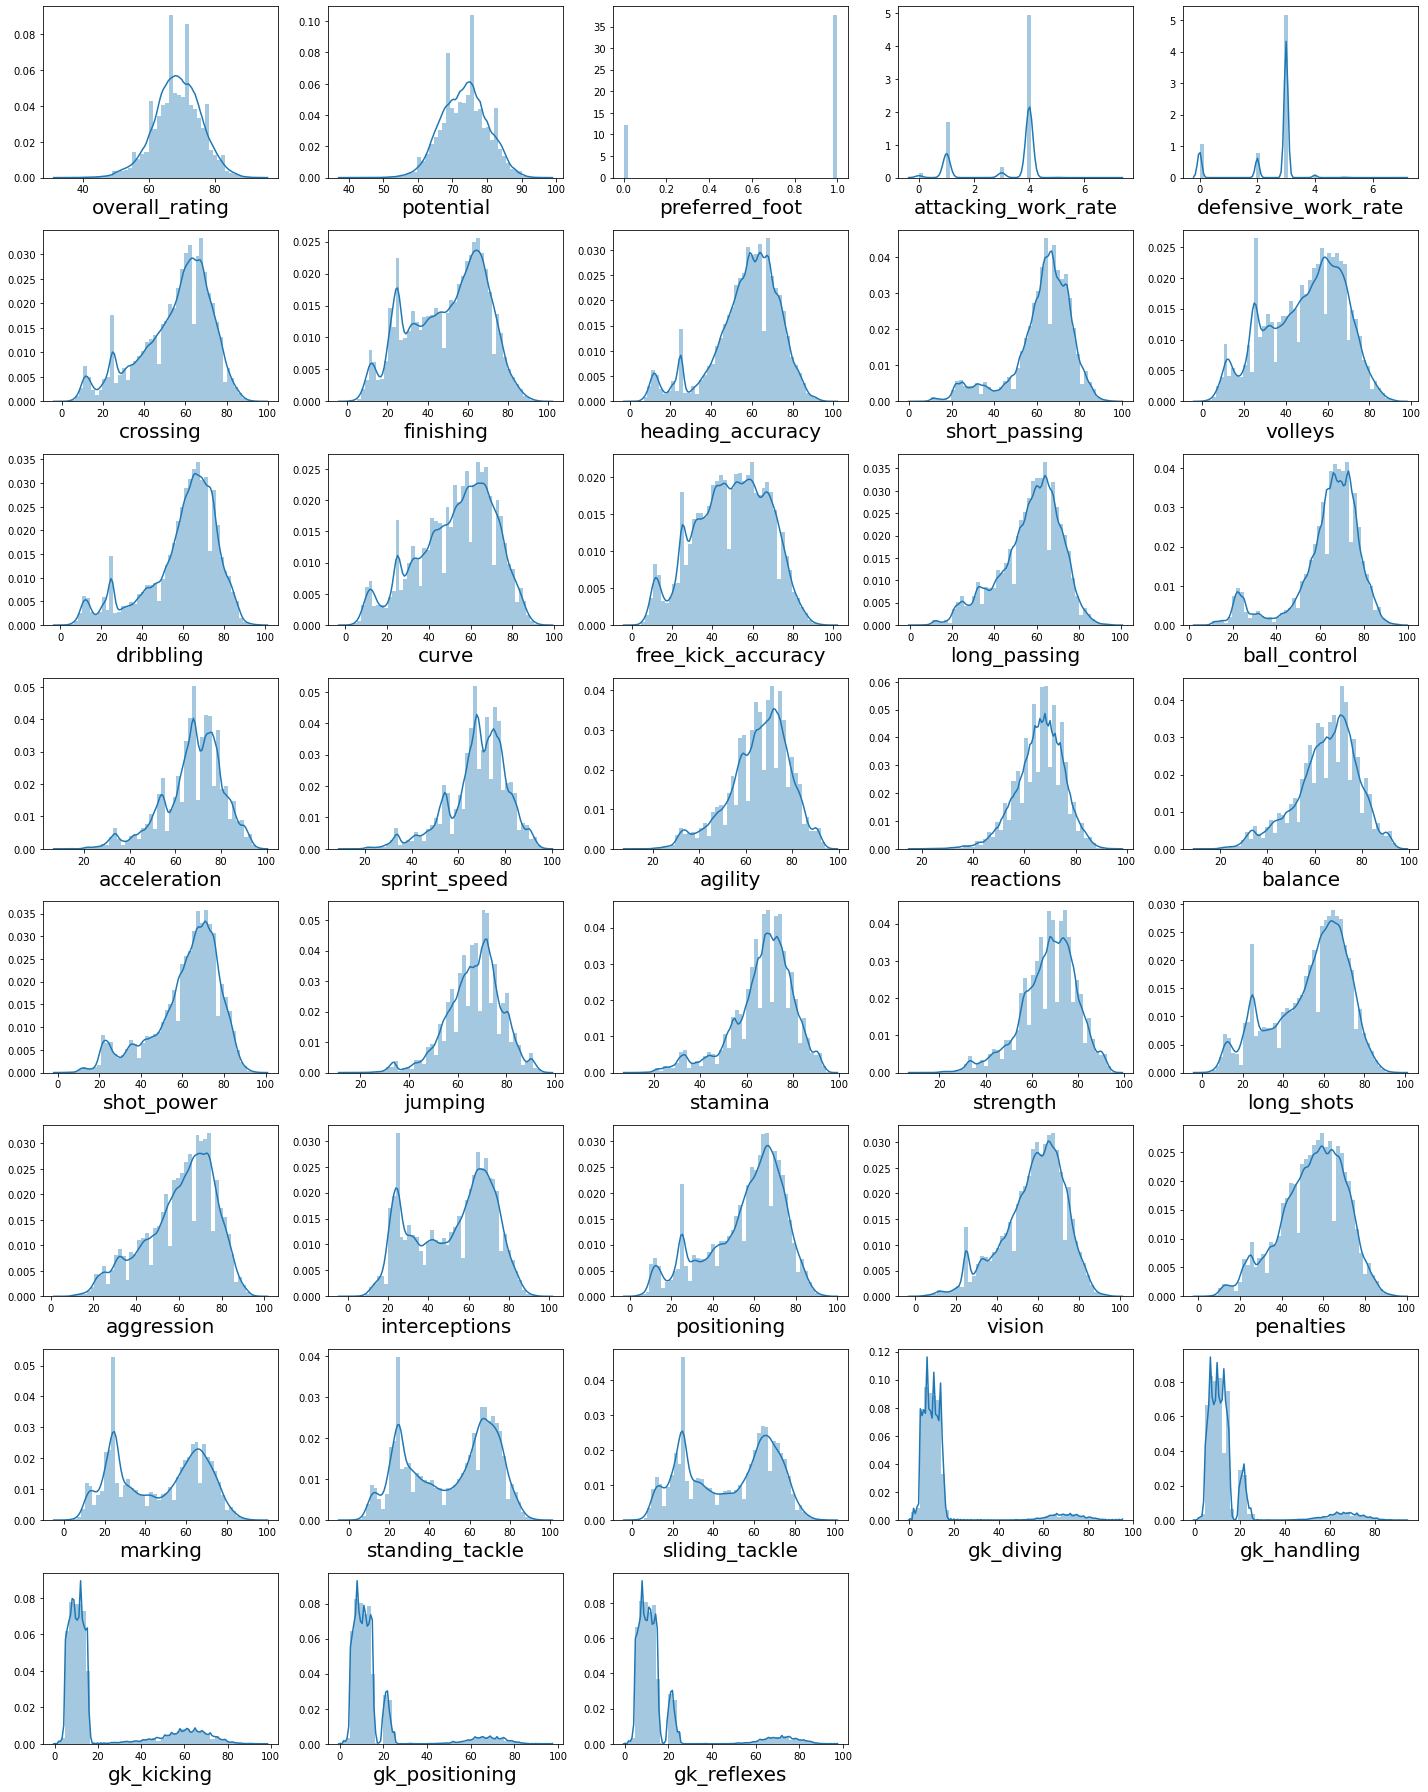

In [26]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_old:
    if plotnumber<=38 :
        ax = plt.subplot(8,5,plotnumber)
        sns.distplot(df_old[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [27]:
y = df["overall_rating"]
X = df.drop(["overall_rating"], axis=1)

Let's standardise the dataset and then perform PCA to reduce our feature dimensions.

Text(0.5, 1.0, 'Explained Variance')

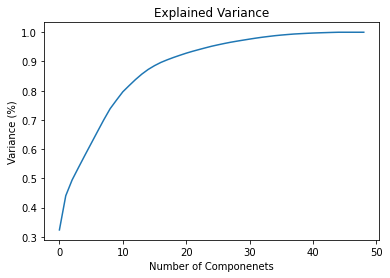

In [28]:
# standardise the dataset
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

# pca to reduce dimensions
pca = PCA()
pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Componenets')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

We can clearly see that more than 90% variance is explained by 20 principal components. Let's train our model with n=20 principal components.

In [29]:
pca = PCA(n_components=20)
temp = pca.fit_transform(X_scaled)
new_df = pd.DataFrame(data=temp)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.172236,2.679257,-1.659545,0.179330,-0.367646,0.008188,-0.030110,0.078552,0.897485,-0.034807,-0.234464,0.297206,0.357270,-0.624023,-0.103776,-0.702434,0.807633,0.023193,0.500299,0.881769
1,1.172236,2.679257,-1.659545,0.179330,-0.367646,0.008188,-0.030110,0.078552,0.897485,-0.034807,-0.234464,0.297206,0.357270,-0.624023,-0.103776,-0.702434,0.807633,0.023193,0.500299,0.881769
2,1.436036,2.033469,-2.245249,0.293783,-0.377174,0.006072,-0.026546,0.152899,0.851713,-0.038388,-0.365233,0.380609,0.318293,-0.567078,0.186659,-0.579438,0.525684,-0.052895,0.508071,0.576629
3,1.631448,1.922412,-2.516077,0.294017,-0.334220,0.007128,-0.022754,0.210160,0.794981,-0.095121,-0.374873,0.412839,0.309160,-0.552860,0.224438,-0.585219,0.451015,-0.001619,0.553186,0.535656
4,1.631448,1.922412,-2.516077,0.294017,-0.334220,0.007128,-0.022754,0.210160,0.794981,-0.095121,-0.374873,0.412839,0.309160,-0.552860,0.224438,-0.585219,0.451015,-0.001619,0.553186,0.535656


Creating a class to split our dataset into train and test data and then pass that data to the model for training.

In [30]:
class DataSplitter():
    def __init__(self, x, y, test_percent = 0.3, random_state=1):
        self.x = x
        self.y = y
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size = test_percent)

class Regression(DataSplitter):
    
    def __init__(self, model_instance, x, y, test_percent = 0.3, random_state=1):
        super().__init__(x, y)
        self.model = model_instance
        self.__fit()
        self.__mse()
        self.__r2()
    
    def __fit(self):
        self.model.fit(self.x_train, self.y_train)
        self.preds = self.model.predict(self.x_test)
        
    def __mse(self):
        self.MSE = mean_squared_error(self.preds, self.y_test)
        
    def __r2(self):
        self.R2_Score = self.model.score(self.x_test, self.y_test)

In [31]:
from sklearn.linear_model import LinearRegression

# linear regression model
lr = LinearRegression()

# feeding model_instance and data to our function
reg_model = Regression(model_instance = lr, x = new_df, y = y)

In [32]:
# accuracy scores
print("The MSE is", reg_model.MSE)
print("The R2 Score is", reg_model.R2_Score)

The MSE is 8.775011667378973
The R2 Score is 0.8215729106762942


Let's try more models

In [33]:
from sklearn.naive_bayes import GaussianNB

# naive bayes model
NB = GaussianNB()

# feeding model_instance and data to our function
NB_model = Regression(model_instance = NB, x = new_df, y = y)

# accuracy scores
print("The MSE is", NB_model.MSE)
print("The R2 Score is", NB_model.R2_Score)

The MSE is 88.37739977933063
The R2 Score is 0.04580728208900331


In [34]:
from sklearn.neighbors import KNeighborsRegressor

# knn regressor model
knn = KNeighborsRegressor()

# feeding model_instance and data to our function
knn_model = Regression(model_instance = knn, x = new_df, y = y)

# accuracy scores
print("The MSE is", knn_model.MSE)
print("The R2 Score is", knn_model.R2_Score)

The MSE is 2.526317028319235
The R2 Score is 0.9490658439524742


In [35]:
from sklearn.tree import DecisionTreeRegressor

# decision tree regressor model
tree = DecisionTreeRegressor()

# feeding model_instance and data to our function
tree_model = Regression(model_instance = tree, x = new_df, y = y)

# accuracy scores
print("The MSE is", tree_model.MSE)
print("The R2 Score is", tree_model.R2_Score)

The MSE is 3.1210074623940542
The R2 Score is 0.9368943374212648


In [36]:
from sklearn.svm import SVR

# svr model
svr = SVR()

# feeding model_instance and data to our function
svr_model = Regression(model_instance = svr, x = new_df, y = y)

# accuracy scores
print("The MSE is", svr_model.MSE)
print("The R2 Score is", svr_model.R2_Score)

The MSE is 2.095297755617613
The R2 Score is 0.9574022449013143


Support Vector Regression gives us the lowest Mean Squared Error and highest R2 Score. Hyperparameter tuning can be used to further improve the model's score but it would be resource intensive.